#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples

#### Due: 25/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Variance Estimation)

Consider the variance estimate
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n(y_i - \bar{y})^2. 
$$
If $Y_i \simiid \Ncal(\mu,\sigma^2)$, then 
$$
\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1}.
$$
1. Use this information to derive a $1-\alpha$ coinfidence interval for $\sigma^2$ (express $L$ and $U$ in terms of $s^2$, $n$, and the relevant quantiles of the $\chi^2$ distribution). 
2. For $n = 2,\ldots,10$ and $\alpha=0.05$, report on the lower ($L$) and upper ($U$) values of the coinfidence interval in terms of $s^2$. 
3. How large $n$ must be to obtain a $0.95$ coinfidence interval of size $0.1s^2$? 

The point: the number of degrees of freedom needed for a reasonable ($10\%$ range) estimate of the variance can be very large. Sometimes, much larger than our data permit.




## Solution

### Solution 1

We are given that $$\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1} $$
--> $$ [\chi^2_{n-1}]^{\frac{\alpha}{2}} < \frac{n-1}{\sigma^2}s^2 < [\chi^2_{n-1}]^{1-\frac{\alpha}{2}}$$
--> $$ [\chi^2_{n-1}]^{1-\frac{\alpha}{2}} s^2 < \sigma^2 < \frac{n-1}{[\chi^2_{n-1}]^{\frac{\alpha}{2}}} s^2 $$
</br>
--> $$ L = \frac{n-1}{[\chi^2_{n-1}]^{1-\frac{\alpha}{2}}} s^2 $$
--> $$ U = \frac{n-1}{[\chi^2_{n-1}]^{\frac{\alpha}{2}}} s^2 $$

DONE.

### Solution 2

In [378]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(style="darkgrid")
sns.set(font_scale=1.5)


In [379]:
ALPHA = 0.05

def calc_ci_for_chi_squared(n, alpha=ALPHA, to_print=True):
    num = n - 1  
    dof = n - 1
    L = num / st.chi2.ppf(1 - alpha/2, dof)
    U = num / st.chi2.ppf(alpha/2, dof)
    if to_print:
        print(f"For n = {n}: L =    {L:.3f} * s^2,    U = {U:.3f} * s^2")
    
    return L, U


In [380]:
for n in range(2, 11):
    calc_ci_for_chi_squared(n)

For n = 2: L =    0.199 * s^2,    U = 1018.258 * s^2
For n = 3: L =    0.271 * s^2,    U = 39.498 * s^2
For n = 4: L =    0.321 * s^2,    U = 13.902 * s^2
For n = 5: L =    0.359 * s^2,    U = 8.257 * s^2
For n = 6: L =    0.390 * s^2,    U = 6.015 * s^2
For n = 7: L =    0.415 * s^2,    U = 4.849 * s^2
For n = 8: L =    0.437 * s^2,    U = 4.142 * s^2
For n = 9: L =    0.456 * s^2,    U = 3.670 * s^2
For n = 10: L =    0.473 * s^2,    U = 3.333 * s^2


### Solution 3

In [381]:

for n in range(2, 100000):
    L, U = get_c_i(n, to_print=False)  # this is in terms of S^2
    
    if U - L <= 0.1:
        print(f"For a CI with size 0.1 * s^2, n should be >= {n}")
        break
        

For a CI with size 0.1 * s^2, n should be >= 3082


## Problem 2 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but 
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arise when an observation $i$ may depend to some extent on only the previous observation’s white noise: an one-lag "holdeover effect". This is also known as the "lag-1 moving average" model (MA(1)). 

1. Show that:
  - $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \Ncal(0,I)$ and $\Sigma^{1/2}$ is symmetric with  $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

  - $$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$
  where $s^2$ is the standard varince estiamte. 
Namely, with positive correlation the "variety" in the data is smaller. 

  - **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \Ncal(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV U_n and V_n, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $ V_n U_n \overset{D}{\to} cU$
2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above. 

3. Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval 
 contains the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $t$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT. 


In [1]:


def genrate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )
    
    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation
    
    """
    assert sigma > 0
    
    # build desired covariance matrix
    Sig = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j : 
                Sig[i,j] = 1
            if np.abs(i-j) == 1:
                Sig[i,j] = rho
                Sig[j,i] = rho
                
    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)
    
    # sample from the standard normal dist. and transform 
    # so that the result is a normal vector with the desired 
    # covaraince structure
    return mu + Sig_sqrt @ np.random.randn(n)


Just playing around - delete
# TODO: DELETE this

In [255]:
n = 2

samples2 = np.random.randn(n, ) * 2 + 0.4
np.std(samples2) * np.sqrt(n)

0.17750047616640202

In [141]:
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind


total_ztest, total_ttest = list(), list()

for i in range(10000):
    samples1 = np.random.randn(1000, ) + 0
    samples2 = np.random.randn(1000, ) * 2 + 0
    ztest_statistic = ztest(samples1, x2=samples2, value=0)
    ttest_statistic = ttest_ind(samples1, x2=samples2, value=0)
    total_ztest.append(ztest_statistic[0])  # z statistic
    total_ttest.append(ttest_statistic[0])  # t statistic


print(f"ztest: {np.mean(total_ztest)}")
print(f"ttest: {np.mean(total_ttest)}")




ztest: -5.659271675955328
ttest: -5.659271675955328


In [272]:
samples1 = np.random.randn(10000 * 1000, ) + 0
samples2 = np.random.randn(10000 * 1000, ) + 0

(np.mean(samples2) - np.mean(samples1)) / np.sqrt(np.std(samples1)/len(samples1) + np.std(samples2) / len(samples1))
(np.mean(samples2) - np.mean(samples1)) / np.std(samples1)

-0.0006772274335215957

In [140]:
samples1 = np.random.randn(10000 * 1000, ) + 0
samples2 = np.random.randn(10000 * 1000, ) * 2 + 0.4

ztest(samples1, x2=samples2, value=0)[0], ttest_ind(samples1, x2=samples2, value=0)[0]

(-565.1528548591299, -565.1528548591308)

## Problem 3 (Regression and Hypothesis Testing)

The dataset for this problem is available in the file temp_TLV_beach.csv, which was taken directly from the meterological service website (https://ims.data.gov.il/ims/1). 

We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area. 
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n. 
\label{eq:model} \tag{2}
$$
(note that the dataset does not contain measurments from all days in the range)

1) Set $y_t = \texttt{Rainfall}$. 
 - Plot $y_t$ versus $t=$`Date` and identify winter times.

- Find the LS regression coefficients $\beta$; plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$. 

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.
 
 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is 
significantly different than $0$ at level $\alpha = 0.01$. 
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)

You may use the code below to format the `Date` column correctly and extract other relevant information from it. 

## Solution

### Solution 1

 - Plot $y_t$ versus $t=$`Date` and identify winter times.


In [336]:
import pandas as pd

path_to_data_file = "rainfall_TLV_beach.csv"
data = pd.read_csv(path_to_data_file)

data['Date'] = pd.to_datetime(data.Date, format="%d-%m-%Y")
data['DayOfYear'] = data.Date.dt.day_of_year
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
y = data.Rainfall.values

data.head()

,StationCode,Date,Rainfall,DayOfYear,Month,Year
0,136320,2005-10-18,0.1,291,10,2005
1,136320,2005-10-19,0.5,292,10,2005
2,136320,2005-10-20,0.1,293,10,2005
3,136320,2005-10-29,0.6,302,10,2005
4,136320,2005-10-30,5.3,303,10,2005


In [337]:
data.describe()

,StationCode,Rainfall,DayOfYear,Month,Year
count,911.0,911.000000,911.000000,911.000000,911.000000
mean,136320.0,8.142261,158.167947,5.682766,2013.697036
std,0.0,11.711135,140.061444,4.575054,4.909554
min,136320.0,0.100000,1.000000,1.000000,2005.000000
25%,136320.0,0.900000,34.500000,2.000000,2010.000000
50%,136320.0,3.400000,83.000000,3.000000,2014.000000
75%,136320.0,10.350000,319.500000,11.000000,2018.000000
max,136320.0,102.600000,366.000000,12.000000,2022.000000


Let's plot Rainfall by Date:

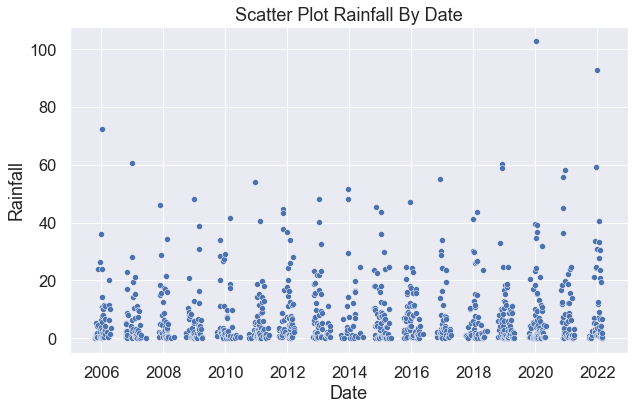

In [318]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.Date, y=y)
plt.title('Scatter Plot Rainfall by Date'.title())
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

Too mush noise, we can't really indetift winter times this way.
</br>
So - let's group by month, to fully indentify the winter times:

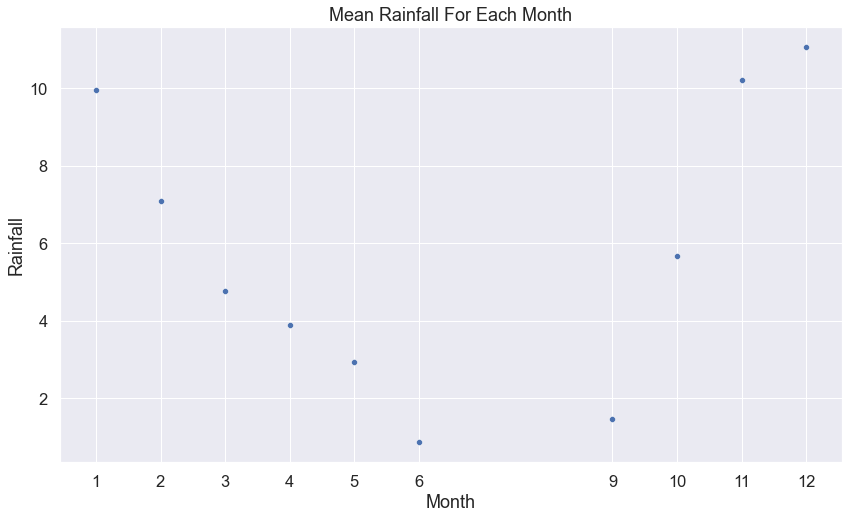

In [388]:
# create a grouped dataframe
data_to_plot = data.groupby(by="Month").mean()
data_to_plot[["Rainfall"]]

# plot the mean of the rainfall per month
months = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12]  # all months in the data
plt.figure(figsize=(14, 8))
sns.scatterplot(x=months, y=data_to_plot.Rainfall)
plt.title('Mean Rainfall for each Month'.title())
plt.xlabel('Month')
plt.xticks(months)
plt.ylabel('Rainfall')
plt.show()

Let's also a boxplot of the Rainfall values, for each month

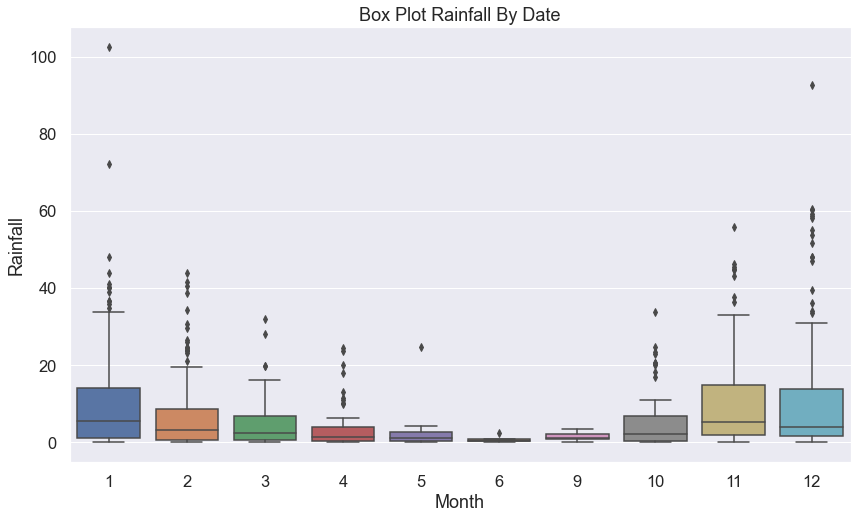

In [386]:

plt.figure(figsize=(14, 8))
sns.boxplot(x="Month", y="Rainfall", data=data)
plt.title('Box Plot for Rainfall by Month'.title())
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.show()

It seems obvious that winter is at (we didn't really define it mathematically - so I'll define it as the 4 months with the most Rainfall):
</br>
12 (DEC)
</br>
11 (NOV)
</br>
1 (JAN)
</br>
2 (FEB)
</br>
</br>

Note: It's safe to assume that July and Augost will probably contain the lowest amount of Rainfall..
</br>
</br>
</br>


We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area. 
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n. 
\label{eq:model} \tag{2}
$$
(note that the dataset does not contain measurments from all days in the range)

- Find the LS regression coefficients $\beta$

In [364]:

x1 = np.cos(2 * np.pi * data.DayOfYear / 365)
data["x1"] = np.cos(2 * np.pi * data.DayOfYear / 365)  # for later use for LS

x2 = np.sin(2 * np.pi * data.DayOfYear / 365)
data["x2"] = np.sin(2 * np.pi * data.DayOfYear / 365)  # for later use for LS


y = data.Rainfall.values

Z = np.vstack([np.ones_like(x1), x1, x2]).T

A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

beta_hat = np.dot(A, y)

print(f"beta_hat vector = {beta_hat}")
print(f"\n B0 = {beta_hat[0]:.2f} \n B1 = {beta_hat[1]:.2f} \n B2 = {beta_hat[2]:.2f}")

beta_hat vector = [ 4.55086224  5.87222444 -0.9130575 ]

 B0 = 4.55 
 B1 = 5.87 
 B2 = -0.91


- plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$. 

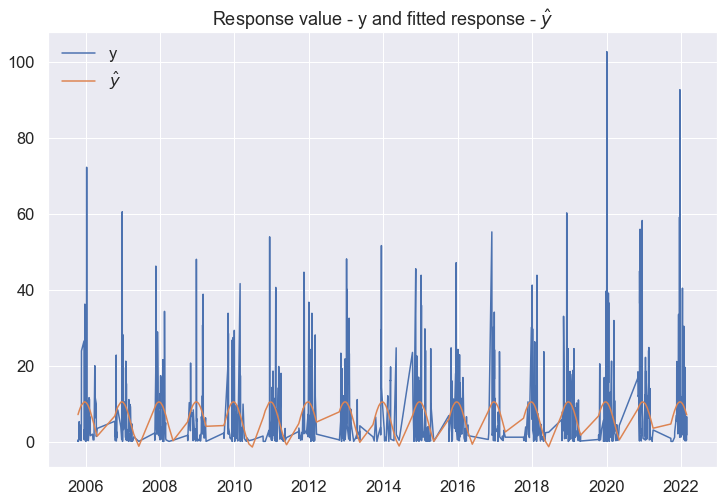

In [343]:
y_hat = np.matmul(Z, beta_hat)


plt.rcParams['figure.figsize'] =  [12, 8]
f, ax = plt.subplots(1, 1)

plt.plot(data.Date, y, label="y", linestyle="-")
plt.plot(data.Date, y_hat, label="$\hat{y}$", linestyle="-")
plt.title(r"Response value - y and fitted response - $\hat{y}$")
plt.legend()
plt.show()

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.

We'll use an F-test. First, let's find B0:

In [347]:
Z_trivial = np.vstack([np.ones_like(x1)]).T

A_trivial = np.dot(np.linalg.inv(np.dot(Z_trivial.T,Z_trivial)), Z_trivial.T)

beta_hat_trivial = np.dot(A_trivial, y)

y_hat_trivial = np.matmul(Z_trivial, beta_hat_trivial)

print(f"beta_hat vector = {beta_hat_trivial}")

beta_hat vector = [8.14226125]


In [392]:

ss_full = np.sum( (y-y_hat) **2 )
ss_sub = np.sum( (y-y_hat_trivial) **2 )

assert ss_full < ss_sub

p = 3
q = 1
n = len(y)

f = ( (n-p) * (ss_sub - ss_full) ) / ( (p-q) * ss_full )

p_value = 2*st.f.sf(f, dfn=p-q, dfd=n-p)

print(f"p_value of the F-test: {p_value}")
print("\nTherefore, it seems that the more complex model is significantly better and than the current (trivial) model.")
print("the trivial model doesn't provide a valid representation of the data compared to the original larger one.")

p_value of the F-test: 1.9262481637450059e-10

Therefore, it seems that the more complex model is significantly better and than the current (trivial) model.
the trivial model doesn't provide a valid representation of the data compared to the original larger one.


 
 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is 
significantly different than $0$ at level $\alpha = 0.01$. 
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)



In [377]:
residuals = y - y_hat
n = len(y)
p = 3
s = np.sqrt(np.sum( residuals**2 )) / np.sqrt(n-p)
feat_set = ["Intercept", "cos", "sin"]

p_values = np.array([])
for i, beta in enumerate(beta_hat):
    c = [0] * p
    c[i] = 1
    c_arr = np.array(c)
        
    numerator = beta - 0  # our hypothesis is that Beta_j = 0
    denominator = s * np.sqrt( c_arr.T @ np.linalg.inv(np.dot(Z.T, Z)) @ c_arr ) 
    
    t = numerator / denominator
    
    p_value = 2*st.t.sf(t, df=n-p)
    p_values = np.append(p_values, p_value)
    

p_values = [p_val if p_val <= 1 else 2-p_val for p_val in p_values] 

for feature, p_val in zip(feat_set, p_values):
    
    print(f"For feature: {feature}, this is the p-value: {p_val:.4f}, is significant = {p_val <= 0.01}")
    

For feature: Intercept, this is the p-value: 0.0000, is significant = True
For feature: cos, this is the p-value: 0.0000, is significant = True
For feature: sin, this is the p-value: 0.1422, is significant = False


Let's also use statmodels:

In [365]:
import statsmodels.formula.api as smf

model = smf.ols(formula="Rainfall ~  + x1 + x2", data=data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     23.66
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           9.63e-11
Time:                        20:41:47   Log-Likelihood:                -3510.6
No. Observations:                 911   AIC:                             7027.
Df Residuals:                     908   BIC:                             7042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5509      0.757      6.015      0.000       3.066       6.036
x1             5.8722      0.972      6.042      0.000       3.965       7.780
x2            -0.9131      0.622     -1.469      0.142      -2.133       0.307
==============================================================================
Omnibus:                      561.737   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5734.453
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      14.035   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Solution 1 - DONE

2) We would like to test whether future data follows a similar distribution to past data. Consider two datasets modeled by
$$
\begin{equation}
y = Z \beta + \epsilon,\qquad y_{new} = Z_{new} \beta + \epsilon_{new}
\label{eq:model} \tag{2}
\end{equation}
$$
where $Z \in \reals^{m\times p}$ and $Z_{new} \in \reals^{n\times p}$ are the given design matrices which both assume to have rank $p$. We also assume that $\epsilon$ and $\epsilon_{new}$ are independent. We will think of $(Z, y)$ as the initial data pair and $(Z_{new},y_{new})$ as the new data.

Let $\hat{\beta} = (Z \top Z)^{-1}Z^\top y$ be the usual least-squares (LS) estimate on the initial data. Define the predicted values as
 $$
 \hat{y}_{new} := Z_{new} \hat{\beta}
 $$
 (note that $\hat{y}_{new}$ is not the LS estiamte of $y_{new}$ from $Z_{new}$)
 
 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$
 
 - Assume $\epsilon_{new} \sim \Ncal(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \reals^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \Ncal(0, \sigma^2 I_n).
 $$
 
- Give the distribution of the ratio
$$
\begin{equation}
A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\label{eq:A} \tag{3}
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \Ncal(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \Ncal(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$

We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way. 

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $\eqref{eq:model}$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \reals^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $\eqref{eq:A}$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$
Plot the P-values for each of the years and also print their values. Discuss briefly. 
- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences. 

 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$
 

 - Assume $\epsilon_{new} \sim \Ncal(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \reals^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \Ncal(0, \sigma^2 I_n).
 $$
 

- Give the distribution of the ratio
$$
\begin{equation}
A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\label{eq:A} \tag{3}
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \Ncal(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \Ncal(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$


We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way. 

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $\eqref{eq:model}$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \reals^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $\eqref{eq:A}$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$


Plot the P-values for each of the years and also print their values. Discuss briefly. 

- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences. 

3) Consider the total amount of rainfall within each month. Suppose that we assume that there is no change in the distribution over time across years, but we suspect that December is usuallly rainier than February. Design a test procedure that checks whether this is true. Use two apporaches:
 - Two-sample t-test 
 - Paired t-test 
 - Which approach seems more approproate here? 

 - Two-sample t-test 
 

 - Paired t-test 
 

 - Which approach seems more approproate here? 